<a href="https://colab.research.google.com/github/y-oth/dst_assessment2/blob/main/report/01-VanillaGradIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Vanilla Gradient**

The Vanilla Gradient, first introduced by Simonyan et al. (2014), is the first and simplest gradient based interpretation method we are exploring. It's core concept is that if a small change to pixel $(i,j)$ has a large impact on the model's confidence in a class, that pixel is of high prediction importance. In this project, we are using saliency maps to visualise pixel importance: the brighter the pixel, the more important it was in the CNN's classification decision.

\
**Set up**

Assume we have an input image

$$x \in [0,1]^{C \times H \times W},$$

 and a neural network

$$f(x)=(f_1(x), f_2(x), \dots, f_K(x)),$$

where $f_i(x)$ is the pre-softmax logit for class $i$ over $K$ classes.

Then the model will predict class $c$ such that

$$c = argmax_{i \in \{1, \dots, K\}} f_i(x).$$

\
**Gradient Based Pixel Importance**

To identify which pixels were used in prediction, Vanilla Gradient computes:

$$G(x) = \nabla_x f_c(x) \in ℜ^{C \times H \times W}$$

This is the Vanilla Gradient and each matrix entry $G_{c,i,j}(x)$ measures how sensitive the class-$c$ logit is to adjustments to pixel $(i,j)$ in channel $c$. We take the absoloute value, since a large magnitude gradient indicates that the pixel is influential in the CNN's decision regardless of direction.

The raw gradient $G(x)$ has shape $(C,H,W)$ (channel, height, width), so to display our 2D Saliency map we need to reduce across channels to $(H,W)$.

$$S_{\text{vanilla}}(i,j)=\max_{c \in \{1, \dots, K\}}\vert G(x)_{c,i,j}\vert$$

Finally, we normalise to $[0,1]$ for visualisation in our saliency map:

$$S = \frac{S - \min(S)}{\max(S) - \min(S)}.$$



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


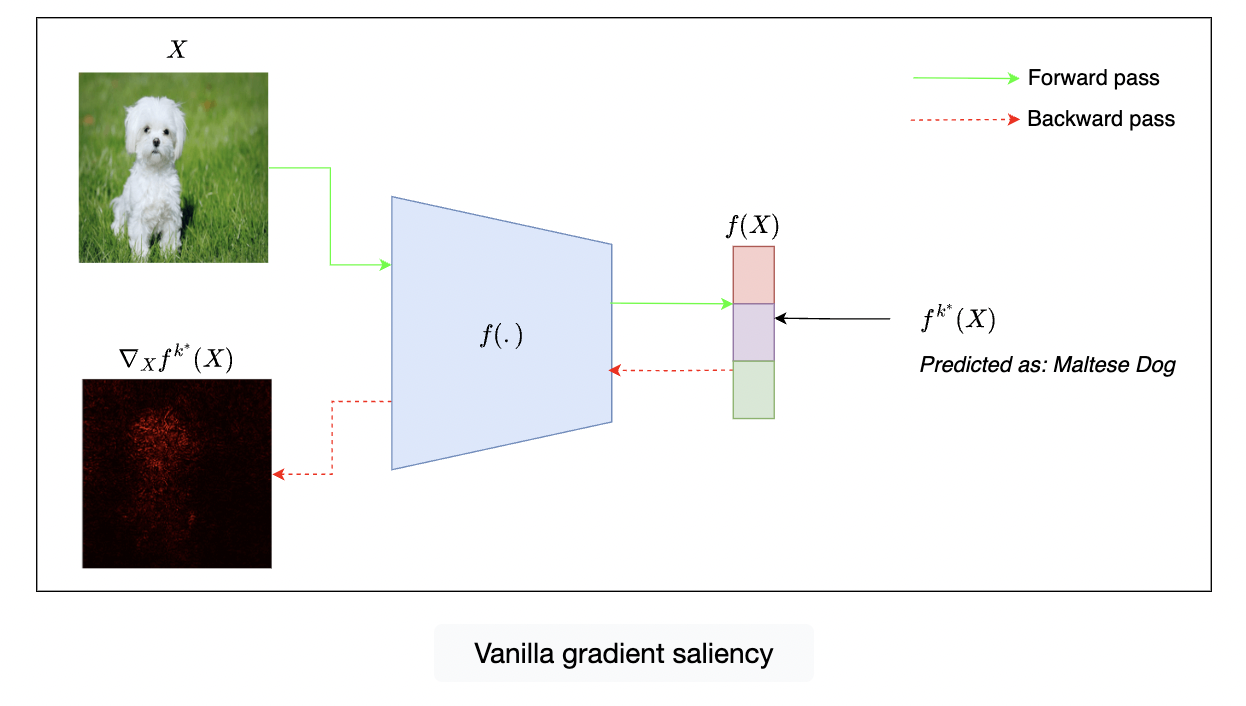

In [ ]:
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/VanillaGrad.png'))

**Vanilla Gradient Saliency Diagram** [3]

The figure above illustrates the Vanilla Gradient Saliency algorithm with an input image $X$.

1) Forwards Pass:

Input image $x$ is passed though model $f(\cdotp)$, producing the logit vector $f(X)$.

2) Class Selection:

From $f(X)$, the model predicts the class with the maximum logit using argmax - here Maltese Dog.

3) Backwards Pass:

Here we backpropogate to compute the gradient of the predicted class score with respect to each input pixel, obtaining Gradient Matrix $G(X)$.

4) Saliency Map:

The final step is taking the absoloute value, reducing the channels and normalising to get our saliency map as seen in the bottom left corner.

**But why is Vanilla Gradient so sensitive to noise?**

A major downfall of Vanilla Gradient is how gradients behave around ReLU (Rectified Linear Units) boundaries, which are used in CNNs.

**ReLU Function** [1]

The ReLU function is the default activation function for many neural networks, since it's computationally simple and exhibits linear behaviour while still learning complex relationships. It can "improve discrimative performance"[2] in CNNs, so is commonly used. The function is defined:

$$ ReLU(x) = max(0, x) $$

After each convolution in our CNN, the ReLU function determines which neurons are 'active' ($x > 0$) and 'deads' any inactive neurons by setting them to $0$. This is important to prevent vanishing gradients, which is a common problem in activation functions like sigmoid or tanh, but I won't cover here.

**ReLU Gradients and Discontinuities**

We can define the gradient as:

$$ReLU'(x) = \begin{cases} 0 & \text{if } x < 0 \\ 1 & \text{if } x > 0 \end{cases}$$

This definition means that when an input $x$ is very close to $0$ (the ReLU boundary), very small pertubations can cause the gradient to flip between $0$ and $1$. Therefore, the gradient is piece-wise linear and discountinous near ReLU boundaries.

Since the Vanilla Gradient measures pixel importance using the gradient of logit $f_c(x)$ via backpropogration, it travels through every ReLU in the CNN (we could have thousands) and a small pertubation in the input $x$ could propogate through, switching the activation of many neurons.

This leads to the 'speckled' or noisy saliency maps we get from a Vanilla Grad.

References:

[1] https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

[2] https://dl.acm.org/doi/10.5555/3104322.3104425

[3] https://www.educative.io/courses/master-explainable-ai-interpreting-image-classifier-decisions/introduction-to-saliency-maps-the-vanilla-gradient

[4] https://christophm.github.io/interpretable-ml-book/pixel-attribution.html